# Objective: 

* Explore the dataset and extract insights using Exploratory Data Analysis.
* Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]
* Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
* Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]
* Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

Consider a significance level of 0.05 for all tests.


# Data:
**AxisInsurance.csv** - it contains information about the insured customers.
* Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
* Sex - This is the policy holder's gender, either male or female.
* BMI - This is the body mass index (BMI), which provides a sense of how over or underweight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
* Children - This is an integer indicating the number of children/dependents covered by the insurance plan.
* Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
* Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
* Charges - Individual medical costs billed to health insurance

In [2]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

### Read the dataset

In [3]:
data = pd.read_csv('AxisInsurance.csv') # Download data from AxisInsurance.csv file

In [4]:
pd.get_dummies(data)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
# copying data to another varaible to avoid any changes to original data
AxisInsurance=data.copy()

### View the first and last 5 rows of the dataset.

In [6]:
data.head() # Exploring initial 5 rows of the data set

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.tail() # Exploring last 5 rows of the data set

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Understand the shape of the dataset.

In [8]:
data.shape

(1338, 7)

* Dataset has 1338 rows and 7 columns.

### Check the data types of the columns for the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Converting variables to categorical
data['sex'] = data.sex.astype('category')             
data['smoker'] = data.smoker.astype('category')  
data['region'] = data.region.astype('category')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


* sex, smoker, region have been converted to categories

`we can see that the memory usage has decreased from 73.3KB to 46.2KB`

### Give a statistical summary for the dataset.

In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* age,bmi,children have approximately same mean and median.
* Mean is greater than the median for charges which suggests that these variable is right skewed in the sample.

In [13]:
data.describe(include=["category"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


* Males and Females are about similar in numbers at 676 and 662 respectively.
* Most customers are non smokers at 1064 people out of 1338 people.
* There are 4 regions with southeast having most insured customers

### Check for missing values

In [14]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no missing values in the data.

### 1. EDA

### Univariate analysis

In [15]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Observations on Age

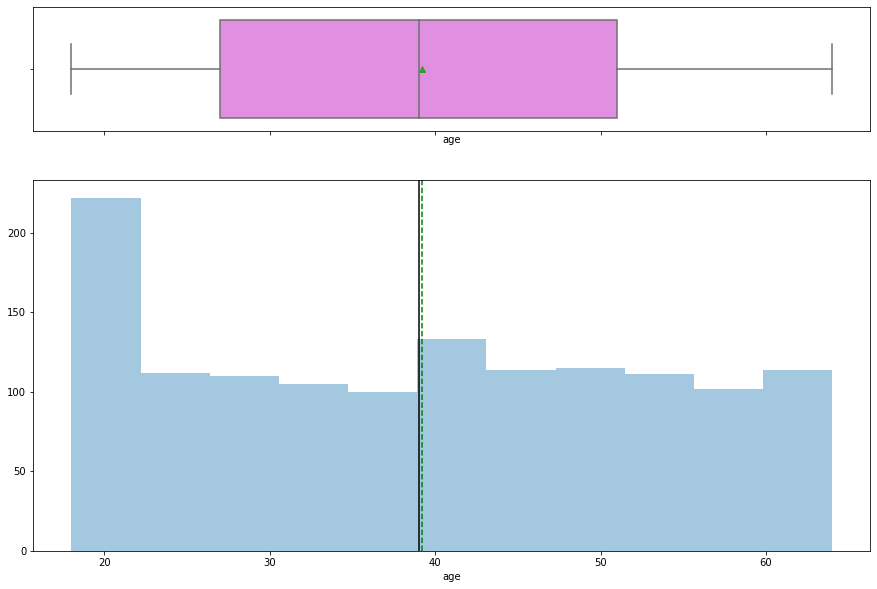

In [16]:
histogram_boxplot(data["age"])

* The distribution of age is approximately normal except for high numbers of insurance customers in the early 20s.
* There are no outliers in this variable.
* From boxplot we can see that the third quartile(Q3) is equal to 52 which means 75% of customers are below the age of 52 and 1st quartile (Q1) is equal to 27 which means 25% of customers are below the age of 27.

## Observations on BMI

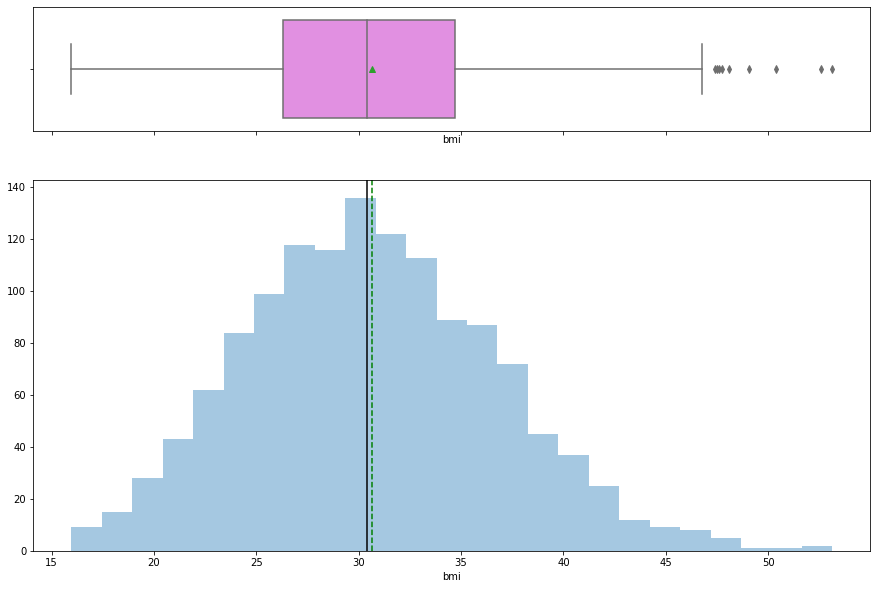

In [17]:
histogram_boxplot(data["bmi"])

* The mean and median BMI is 30.
* The distribution of customer BMI is normal and slightly skewed to the right.
* There are handful of outliers towards the higher BMI end.

## Observations on Children

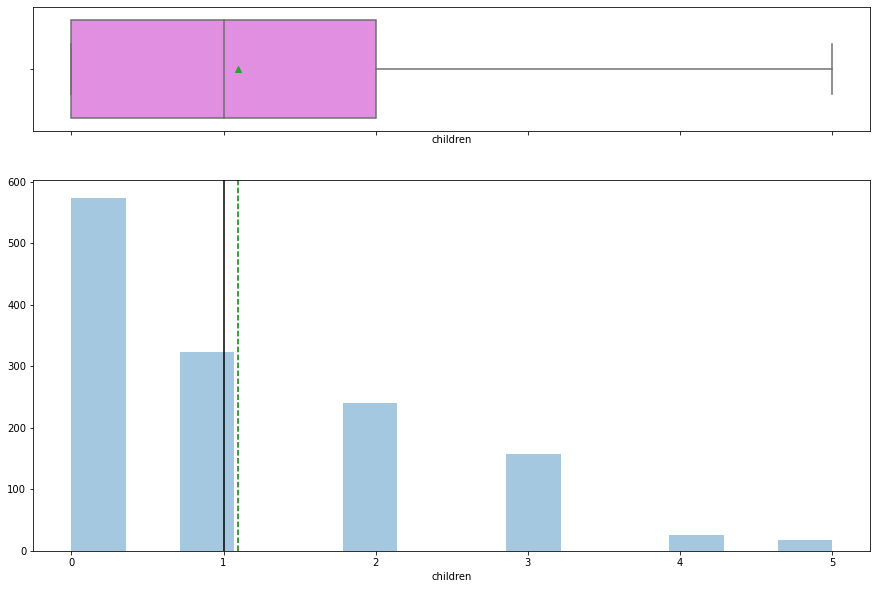

In [18]:
histogram_boxplot(data["children"])

* Customers in the sample mostly have 0 to 3 children.
* There are no outliers.

## Observations on Charges

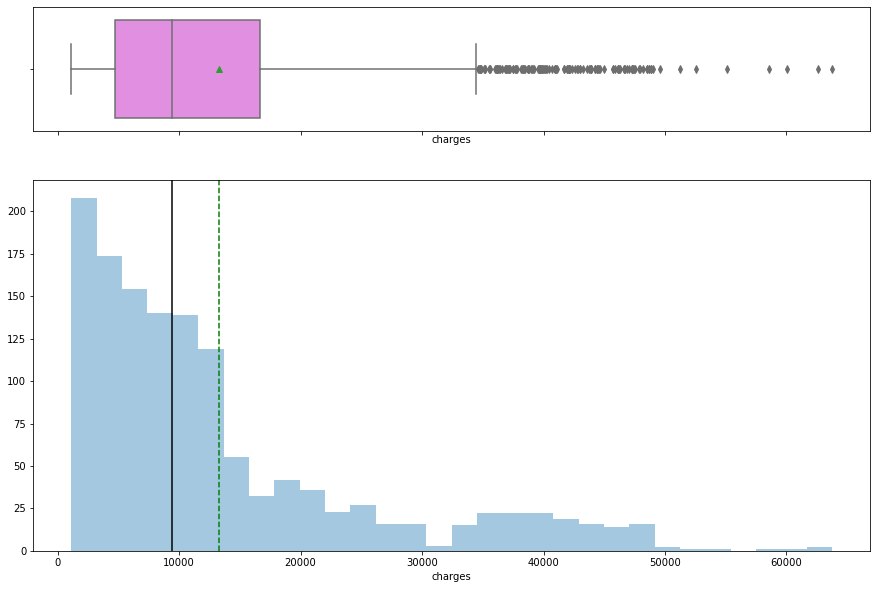

In [19]:
histogram_boxplot(data["charges"])

* Mean medical claims in the insurance sample is around 14000 dollars and Median medical claims is around 9500 dollars.
* Medical claims are right skewed.
* It has outliers towards the higher claim end.

In [20]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

## Observations on Sex

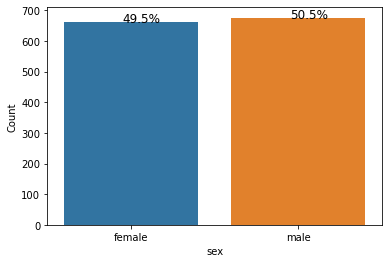

In [21]:
ax = sns.countplot(data["sex"]) # Plot histogram
plt.xlabel('sex')
plt.ylabel('Count')
perc_on_bar(ax,data["sex"])

* Males and Females are about similar in numbers at 676 (50.5%) and 662 (49.5%) respectively in the insurance sample.

## Observations on Smoker

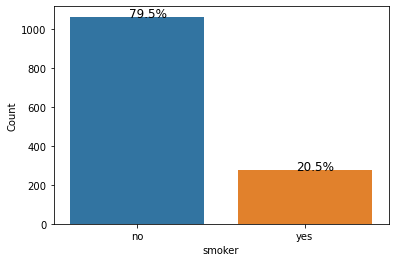

In [22]:
ax = sns.countplot(data["smoker"]) # Plot histogram
plt.xlabel('smoker')
plt.ylabel('Count')
perc_on_bar(ax,data["smoker"])

* Non smokers outnumber smokers 4:1 ratio at 1064 (79.5%) and 274 (20.5%) respectively in the insurance sample.

# Observations on Region

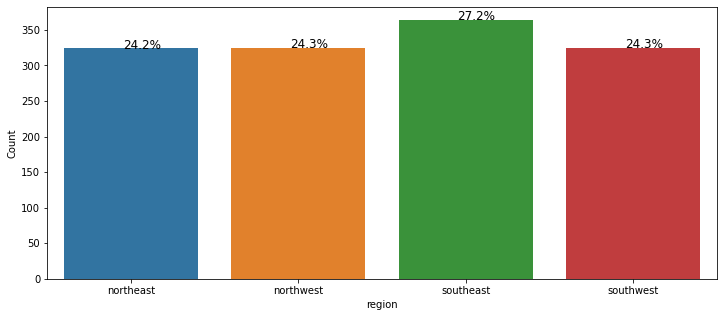

In [23]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data["region"]) # Plot histogram
plt.xlabel('region')
plt.ylabel('Count')
perc_on_bar(ax,data["region"])

* Customers are quite evenly spread across the regions with southeast region having slightly more share (27.2%) at 364 customers.

## Bivariate Analysis

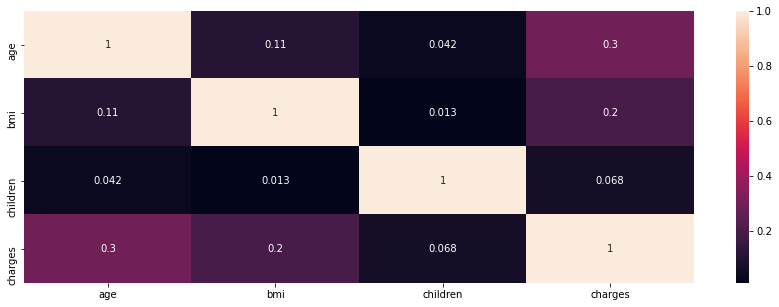

In [24]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

* There is no striking correlation found among these variables.
* There is a light positive correlation between age and medical charges.

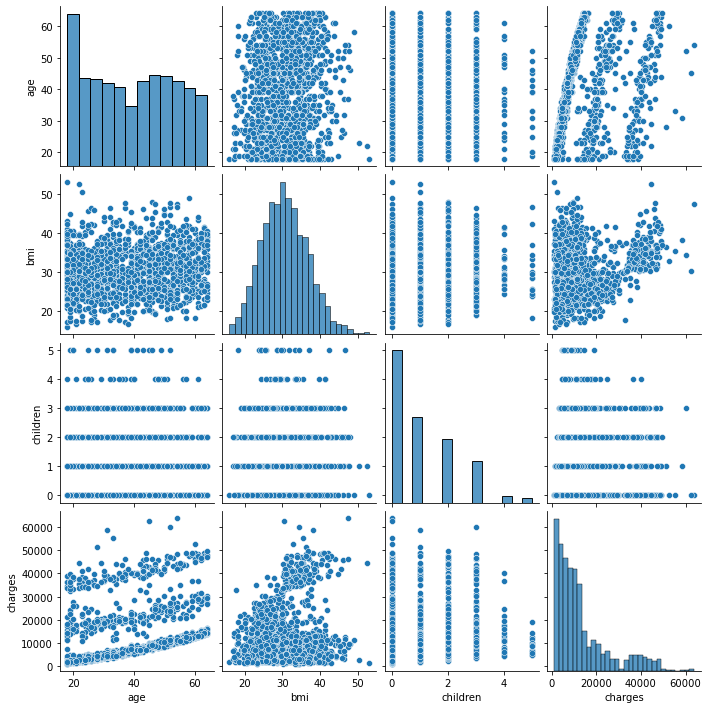

In [25]:
sns.pairplot(data)
plt.show()

* We can see varying distributions in variables with no discerning pattern, we should investigate further.
* BMI is normal distributed with slight right skew.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


### Age vs Charges

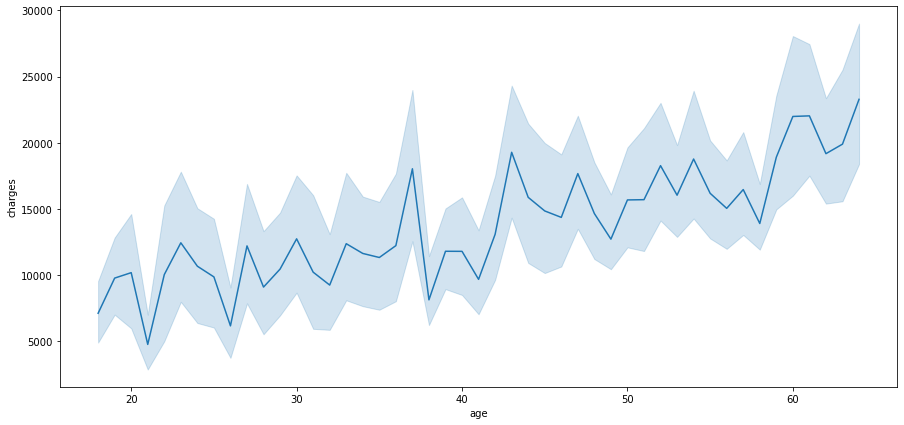

In [27]:
plt.figure(figsize=(15,7))
sns.lineplot(data["age"],data["charges"])
plt.show()

* Medical charges tend to trend higher as customer age increases.

### BMI vs Charges

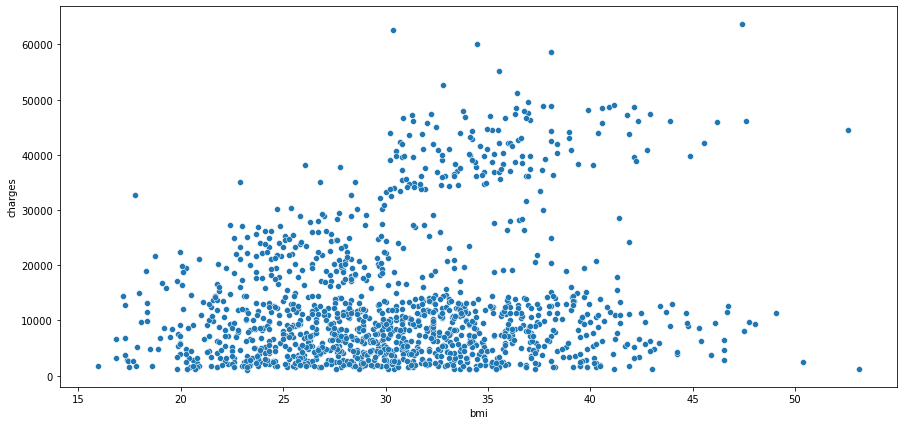

In [28]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='bmi', y='charges', data=data) # scatter plot 
plt.show()

* Not much of a clear discerning relation can be found between bmi and medical charges

### No. of Children vs Charges

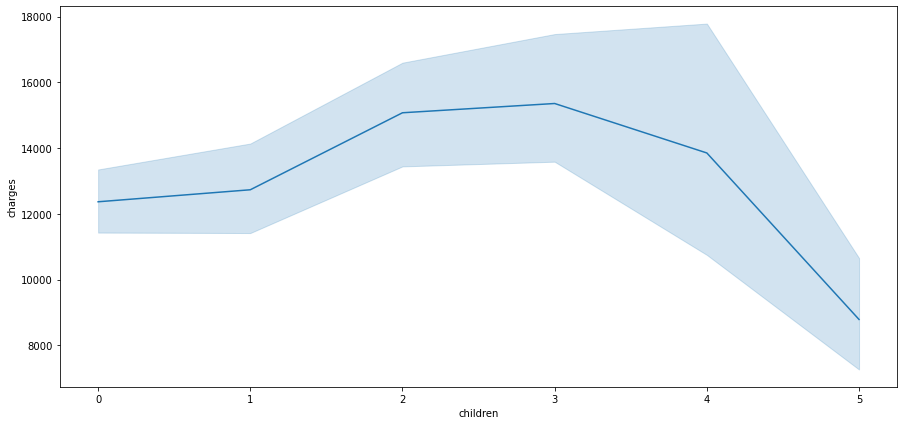

In [29]:
plt.figure(figsize=(15,7))
sns.lineplot(data["children"],data["charges"])
plt.show()

* Medical charges tend to trend downward with customers having more children

### Sex vs Charges

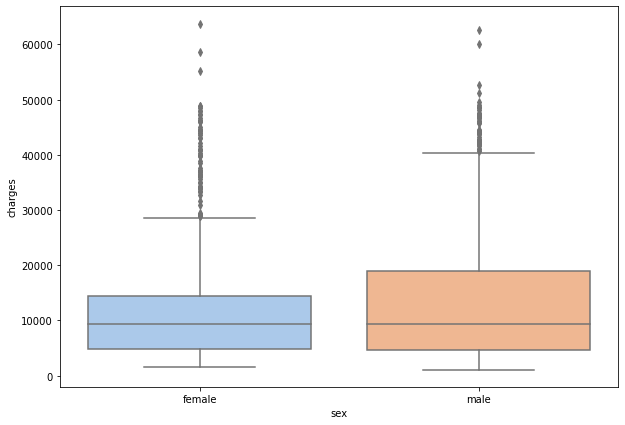

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(data["sex"],data["charges"],palette="pastel")
plt.show()

* Median and minimum medical charges are about the same for both sexes.
* Male medical charges range higher than female medical charges at the higher range of 40K dollars compared to 30K dollars with both having outliers.

### Smoker/Non Smoker vs Charges

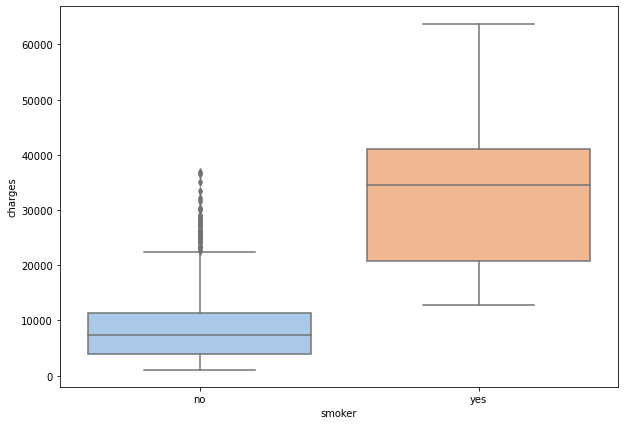

In [31]:
plt.figure(figsize=(10,7))
sns.boxplot(data["smoker"],data["charges"],palette="pastel")
plt.show()

* Smokers have higher medical charge ranges on average than non smokers at ~ 4 times.
* Non Smokers exhibit some medical charge outliers.

### Residential Region vs Charges

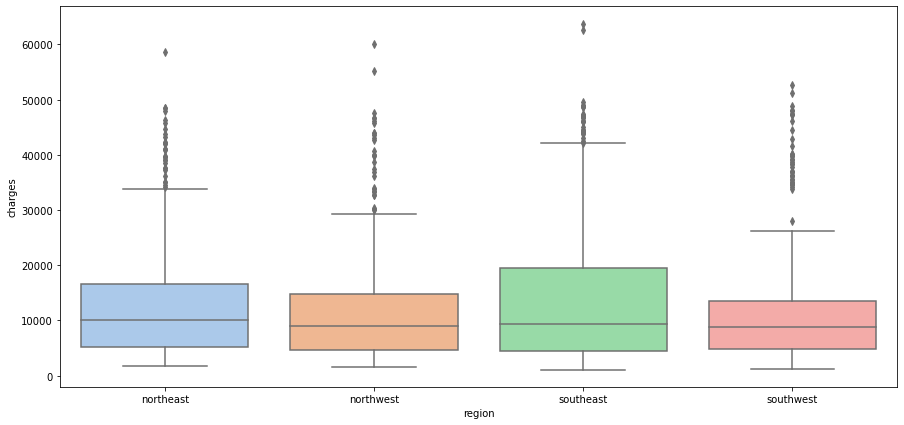

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(data["region"],data["charges"],palette="pastel")
plt.show()

* Customers from all residential regions have somewhat similar median and range of medical charges.
* Southeast region exhibit a slightly higher range of medical charges on the higher end at above 40K dollars.

### Sex vs Smoker/Non Smoker

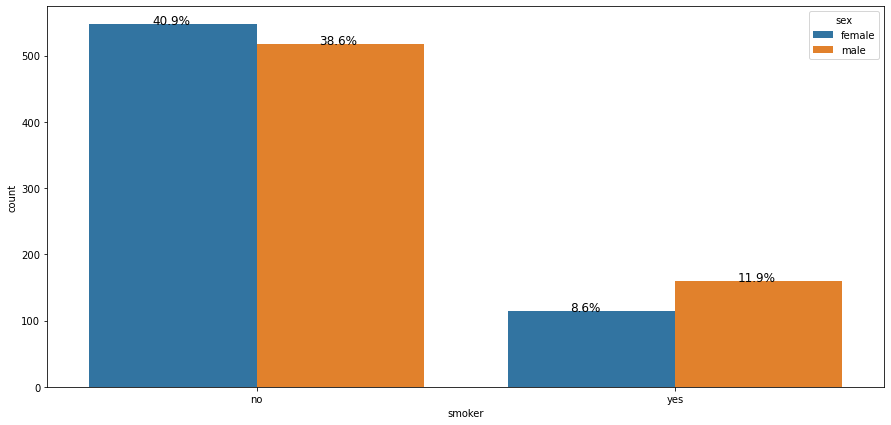

In [33]:
plt.figure(figsize=(15,7))  # setting the figure size
ax = sns.countplot(x='smoker', data=data, hue='sex') # Plot histogram
perc_on_bar(ax,data["region"])

* Male smokers outnumber female smokers.
* Non Smokers are the vast majority in the sample and by extension the population.

### Region vs Smoker/Non Smoker

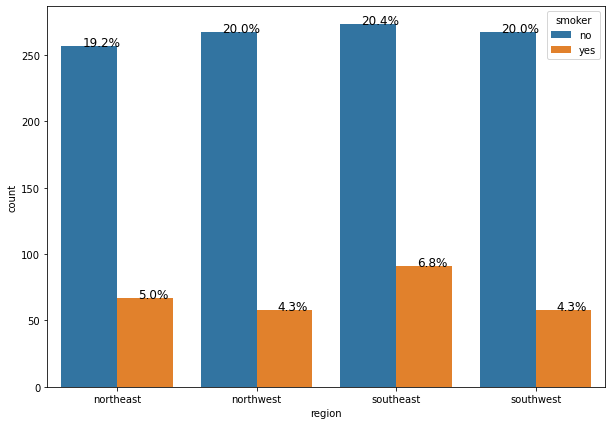

In [34]:
plt.figure(figsize=(10,7))  # setting the figure size
ax = sns.countplot(x='region', data=data, hue='smoker') # Plot histogram
perc_on_bar(ax,data["region"])

* Non-smoker numbers are comparable across regions but smoker numbers are markedly higher and could be the main driver of higher medical charges in the Southeast region.

### Females' BMI vs Number of Children

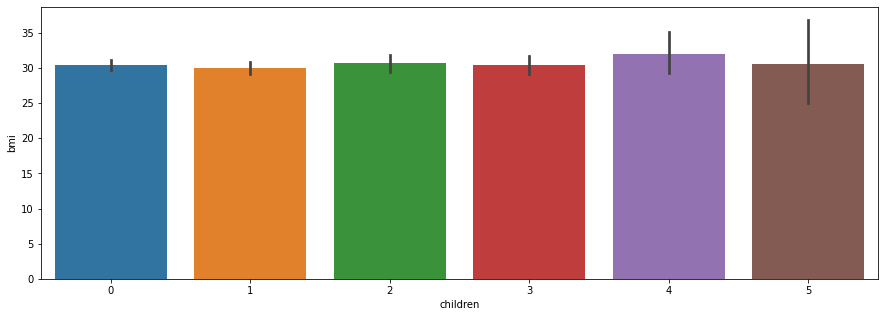

In [35]:
# Preparing Dataframe that has females with children only
datafemale = pd.DataFrame()
datafemale = data.loc[data['sex'] == 'female']

plt.figure(figsize=(15,5))
sns.barplot(data=datafemale,x='children',y='bmi') #hue color can differentiate column
plt.show()

* There is not much significant difference in BMI between women who have different number of children other than women with 4 to 5 children have higher BMI variance.

### Sex vs BMI

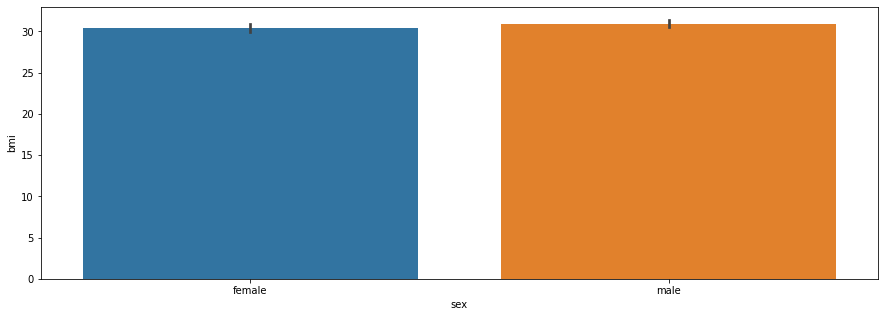

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='bmi') #hue color can differentiate column
plt.show()

* Male and female do not differ much in their BMI.

### Customer Profiles

* Medical charges tend to trend higher as customer age increases which is expected.

* Male medical charges range higher than female medical charges at the higher range of 40K dollars compared to 30K dollars.

* Smokers have higher medical charge ranges on average than non smokers at ~ 4 times and Male smokers outnumber female smokers.

* Southeast region exhibit a slightly higher range of medical charges on the higher end at above 40K dollars. Non-smoker numbers are comparable across regions but smoker numbers are markedly higher and could be the main driver of higher medical charges in the Southeast region.

* Male and female do not differ much in their BMI.

* There is not much significant difference in BMI between women who have different number of children other than women with 4 to 5 children have higher BMI variance.

### Sex vs Smoker/Non Smoker vs Charges

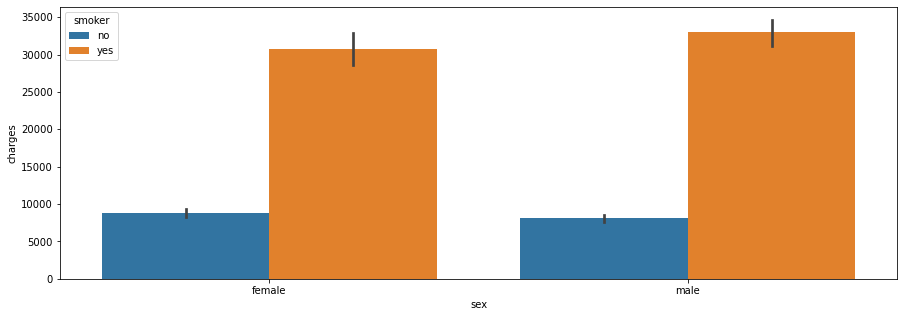

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='charges',hue='smoker') #hue color can differentiate column
plt.show()

* Male smokers have higher medical charges at 32.5K dollars compared to female 30K dollars.

### Residential Region vs Charges vs Smoker/Non Smoker

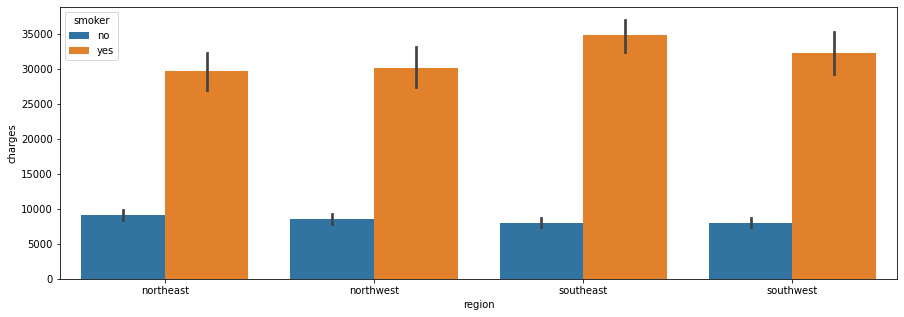

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='region',y='charges',hue='smoker') #hue color can differentiate ae column
plt.show()

* Southeast region exhibit a higher range of medical charges largely driven by their smoker segment.

### Residential Region vs Charges vs Sex

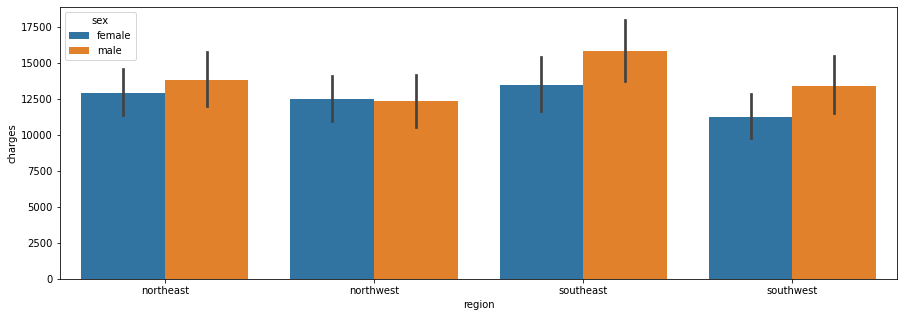

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='region',y='charges',hue='sex') #hue color can differentiate ae column
plt.show()

* Males constitute a higher delta than females in medical charges in Southeast region than most other regions.

### Grouping data w.r.t to conduct analysis

In [40]:
data[data["region"]=="southeast"].describe(include="all") # Profile of the Southeast region population sample

,age,sex,bmi,children,smoker,region,charges
count,364.000000,364,364.000000,364.000000,364,364,364.000000
unique,NaN,2,NaN,NaN,2,1,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,189,NaN,NaN,273,364,NaN
mean,38.939560,NaN,33.355989,1.049451,NaN,NaN,14735.411438
std,14.164585,NaN,6.477648,1.177276,NaN,NaN,13971.098589
min,18.000000,NaN,19.800000,0.000000,NaN,NaN,1121.873900
25%,26.750000,NaN,28.572500,0.000000,NaN,NaN,4440.886200
50%,39.000000,NaN,33.330000,1.000000,NaN,NaN,9294.131950
75%,51.000000,NaN,37.812500,2.000000,NaN,NaN,19526.286900


In [41]:
data.describe(include="all") # Profile of the whole population sample

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


* Southeast region exhibit a higher proportion of smokers (about 33%) in their population than the mean number (about 25%) for all 4 regions.

### Conclusion

After all the analysis,  we have been able to conclude that 

* Smokers claim higher medical charges at ~ 4 times than non smokers. Male smokers also claim higher medical charges than female smokers and they outnumber female smokers.  

* The Southeast region boosts a higher  medical charge per capita largely driven by their larger number of smokers than other regions with the insurance package. It also has a higher proportion of smokers at ~ 33% of the insurance customer base.

* Male and female do not differ much in their BMI. There is also not much significant difference in BMI between women who have different number of children other than women with 4 to 5 children have higher BMI variance.


### Recommendations

* Based on the analysis, the following recommendations can improve the sales and profits

* Marketing the insurance packages to non smokers and females can help in increasing sales and profits as these 2 segments of customers claim less than male and/or smokers.

* Marketing to potential customers in the west of the country is recommended as these regions have less of a proportion of smokers.

* Potentially exploring reducing premiums for non smokers and increasing for smokers as smokers on average claim much higher  medical chargers than non smokers. This can entice more non smokers to join the insurance packages and entice existing customers to consider quitting smoking to enjoy premium reduction benefits.

### 2. Prove (or disprove) that medical claims made by the people who smoke is greater than those who don't

Let $\mu_1, \mu_2$ be the mean medical claims of smokers and non-smokers respectively.

We will test the null hypothesis

>$H_0:\mu_1\leq\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

In [42]:
datasmoker = pd.DataFrame()
datasmoker = data.loc[data['smoker'] == 'yes', 'charges']
datasmoker.describe(include='all') # Mean smokers medical claims = 32050.23 (This is a safe test to extract the mean for comparison)

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

In [43]:
datasmoker.head()

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

In [44]:
datasmoker.tail()

1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, dtype: float64

In [45]:
datanonsmoker = pd.DataFrame()
datanonsmoker = data.loc[data['smoker'] == 'no', 'charges']
datanonsmoker.describe(include='all') # Mean non smokers medical claims = 8434.27 (This is a safe test to extract the mean for comparison)

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

In [46]:
datanonsmoker.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [47]:
datanonsmoker.tail()

1332    11411.6850
1333    10600.5483
1334     2205.9808
1335     1629.8335
1336     2007.9450
Name: charges, dtype: float64

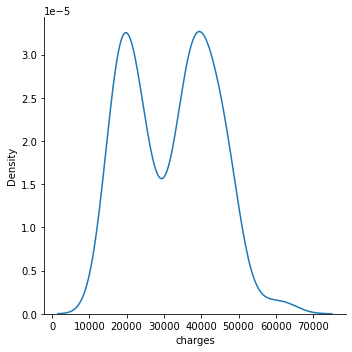

In [48]:
import seaborn as sns
sns.displot(datasmoker,kind="kde")

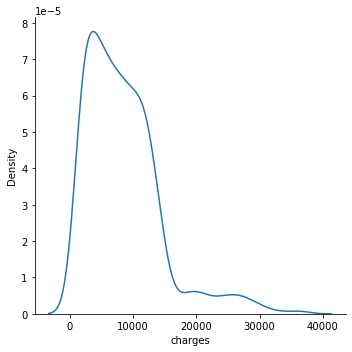

In [49]:
import seaborn as sns
sns.displot(datanonsmoker,kind="kde")

In [50]:
print('The mean medical claims of smokers is ' + str(round(datasmoker.mean(),2)))
print('The mean medical claims of non smokers is ' + str(round(datanonsmoker.mean(),2)))
print('The standard deviation of medical claims of smokers is ' + str(round(datasmoker.std(),2)))
print('The standard deviation of medical claims of non smokers is ' + str(round(datanonsmoker.std(),2)))

The mean medical claims of smokers is 32050.23
The mean medical claims of non smokers is 8434.27
The standard deviation of medical claims of smokers is 11541.55
The standard deviation of medical claims of non smokers is 5993.78


### A different method of extracting smoker and non smoker medical claims and extracting mean and standard deviation is proven

In [51]:
print('The mean medical claims of smokers is ' + str(round(data.loc[data['smoker'] == 'yes', 'charges'].mean(),2)))
print('The mean medical claims of non smokers is ' + str(round(data.loc[data['smoker'] == 'no', 'charges'].mean(),2)))
print('The standard deviation of medical claims of smokers is ' + str(round(data.loc[data['smoker'] == 'yes', 'charges'].std(),2)))
print('The standard deviation of medical claims of non smokers is ' + str(round(data.loc[data['smoker'] == 'no', 'charges'].std(),2)))

The mean medical claims of smokers is 32050.23
The mean medical claims of non smokers is 8434.27
The standard deviation of medical claims of smokers is 11541.55
The standard deviation of medical claims of non smokers is 5993.78


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the medical claims are measured on a continuous scale.
* Normally distributed populations - Yes, we assume that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we assume that the collected sample a simple random sample.

We can use two sample T-test (Unequal Std Dev) for this problem.

### Let's find the p-value

In [52]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(data.loc[data['smoker'] == 'yes', 'charges'], data.loc[data['smoker'] == 'no', 'charges'], equal_var = True, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  4.1357179210886093e-283


### Insight
As the p-value is much less than the level of significance of 0.05, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that medical claims made by the people who smoke is greater than those who don't.

### 3. Prove (or disprove) that the BMI of females is different from that of males

Let $\mu_1, \mu_2$ be the mean BMI of females and males respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1\neq\mu_2$

In [53]:
datafemale = pd.DataFrame()
datafemale = data.loc[data['sex'] == 'female', 'bmi']
datafemale.describe(include='all')

count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64

In [54]:
datafemale.head()

0    27.90
5    25.74
6    33.44
7    27.74
9    25.84
Name: bmi, dtype: float64

In [55]:
datafemale.tail()

1332    44.70
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, dtype: float64

In [56]:
datamale = pd.DataFrame()
datamale = data.loc[data['sex'] == 'male', 'bmi']
datamale.describe(include='all')

count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64

In [57]:
datamale.head()

1    33.770
2    33.000
3    22.705
4    28.880
8    29.830
Name: bmi, dtype: float64

In [58]:
datamale.tail()

1324    25.935
1325    33.535
1327    30.030
1329    38.600
1333    30.970
Name: bmi, dtype: float64

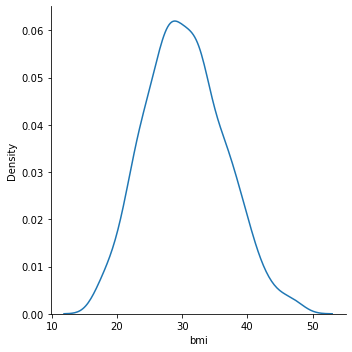

In [59]:
import seaborn as sns
sns.displot(datafemale,kind="kde")

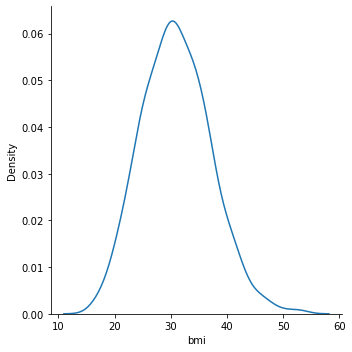

In [60]:
import seaborn as sns
sns.displot(datamale,kind="kde")

In [61]:
print('The mean BMI of females is ' + str(round(data.loc[data['sex'] == 'female', 'bmi'].mean(),2)))
print('The mean BMI of males is ' + str(round(data.loc[data['sex'] == 'male', 'bmi'].mean(),2)))
print('The standard deviation of medical claims of smokers is ' + str(round(data.loc[data['sex'] == 'female', 'bmi'].std(),2)))
print('The standard deviation of medical claims of non smokers is ' + str(round(data.loc[data['sex'] == 'male', 'bmi'].std(),2)))

The mean BMI of females is 30.38
The mean BMI of males is 30.94
The standard deviation of medical claims of smokers is 6.05
The standard deviation of medical claims of non smokers is 6.14


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the BMI is measured on a continuous scale.
* Normally distributed populations - Yes, we assume that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Equal population standard deviations - As the sample standard deviations are almost equal, the population standard deviations may be assumed to be equal.
* Random sampling from the population - Yes, we assume that the collected sample is a simple random sample.

We can use two sample T-test (Equal Std Dev) for this problem.

### Let's find the p-value

In [62]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(data.loc[data['sex'] == 'female', 'bmi'], data.loc[data['sex'] == 'male', 'bmi'], equal_var = True, alternative = 'two-sided')
print('The p-value is ' + str(p_value))

The p-value is 0.08997637178984934


### Insight
As the p-value(~0.09) is greater than the level of significance, we can not reject the null hypothesis. Hence, we do not have enough significance to conclude that BMI of females is different from that of males at 0.05 significance level.

### 4. Is the proportion of smokers significantly different across different regions?

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


### Test whether 2 categorical variables are independent

In [64]:
datacrosstab = pd.DataFrame()
datacrosstab = pd.crosstab(data.region, data.smoker)
datacrosstab.head()

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


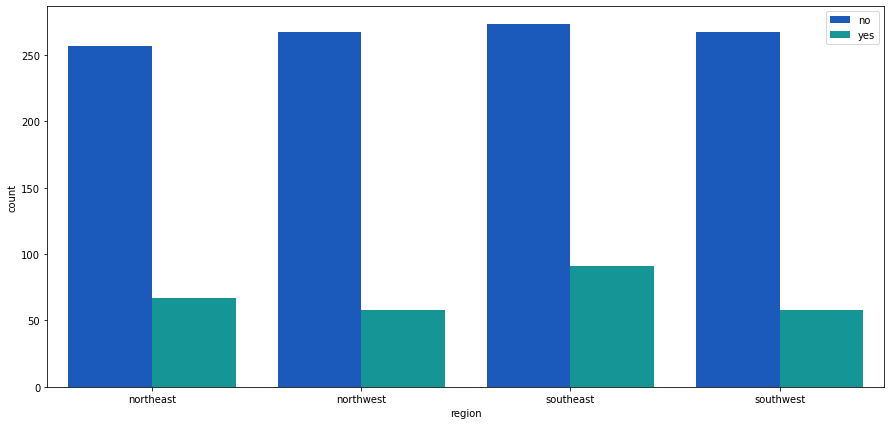

In [65]:
plt.figure(figsize=(15,7))
sns.countplot(data["region"], hue=data["smoker"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

We will test the null hypothesis

>$H_0:$ Smoker numbers are independent of region.

against the alternate hypothesis

>$H_a:$ Smoker numbers are dependant on region

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, collected sample is a simple random sample of the population.

### Let's find the p-value

In [66]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(datacrosstab)
print('The p-value is', p_value)

The p-value is 0.06171954839170541


### Insight
As the p-value is just above the significance level, we fail to reject the null hypothesis. Hence, we do have enough statistical significance to conclude that smoker numbers are independent of region at 5% significance level. Z Test for 2 proportions can be used as the populations are independent.

### A: Test North East vs North West Region for proportion of smokers

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of smokers in North East and North West regions respectively.

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 \neq p_2$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a person is either smoker or non smoker.
*   Random sampling from the population - Yes, we assume that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. 

### Let's find the p-value

In [67]:
datacrosstab.head()

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [68]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of smokers
smoker_count = np.array([67, 58])

# set the sample sizes
nobs = np.array([324, 325])

# find the p-value
test_stat, p_value = proportions_ztest(smoker_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.3601698716632562


### Insight

As the p-value is greater than the significance level 0.05, we can not reject the null hypothesis. Thus, we do not have enough statistical significance to conclude that the proportion of smokers in North East and North West regions are significantly different.

### B: Test North East vs South East Region for proportion of smokers

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of smokers in North East and South East regions respectively.

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 \neq p_2$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a person is either smoker or non smoker.
*   Random sampling from the population - Yes, we assume that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. 

### Let's find the p-value

In [69]:
datacrosstab.head()

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [70]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of smokers
smoker_count = np.array([67, 91])

# set the sample sizes
nobs = np.array([324, 364])

# find the p-value
test_stat, p_value = proportions_ztest(smoker_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.17861355436256732


### Insight

As the p-value is greater than the significance level 0.05, we can not reject the null hypothesis. Thus, we do not have enough statistical significance to conclude that the proportion of smokers in North East and South East regions are significantly different.

### C: Test North East vs South West Region for proportion of smokers

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of smokers in North East and South West regions respectively.

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 \neq p_2$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a person is either smoker or non smoker.
*   Random sampling from the population - Yes, we assume that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. 

### Let's find the p-value

In [71]:
datacrosstab.head()

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [72]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of smokers
smoker_count = np.array([67, 58])

# set the sample sizes
nobs = np.array([324, 325])

# find the p-value
test_stat, p_value = proportions_ztest(smoker_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.3601698716632562


### Insight

As the p-value is greater than the significance level 0.05, we can not reject the null hypothesis. Thus, we do not have enough statistical significance to conclude that the proportion of smokers in North East and South West regions are significantly different.

### D: Test North West vs South East Region for proportion of smokers

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of smokers in North West and South East regions respectively.

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 \neq p_2$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a person is either smoker or non smoker.
*   Random sampling from the population - Yes, we assume that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10.

### Let's find the p-value

In [73]:
datacrosstab.head()

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [74]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of smokers
smoker_count = np.array([58, 91])

# set the sample sizes
nobs = np.array([325, 364])

# find the p-value
test_stat, p_value = proportions_ztest(smoker_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.022789815463035743


### Insight

As the p-value is less than the significance level 0.05, we can reject the null hypothesis. Thus, we do have enough statistical significance to conclude that the proportion of smokers in North West and South East regions are significantly different.

### E: Test North West vs South West Region for proportion of smokers

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of smokers in North West and South West regions respectively.

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 \neq p_2$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a person is either smoker or non smoker.
*   Random sampling from the population - Yes, we assume that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10.

### Let's find the p-value

In [75]:
datacrosstab.head()

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [76]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of smokers
smoker_count = np.array([58, 58])

# set the sample sizes
nobs = np.array([325, 325])

# find the p-value
test_stat, p_value = proportions_ztest(smoker_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 1.0


### Insight

As the p-value is much much greater than the significance level 0.05, we cannot reject the null hypothesis. Thus, we do not have enough statistical significance to conclude that the proportion of smokers in North West and South West regions are significantly different.

### F: Test South East vs South West Region for proportion of smokers

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of smokers in South East and South West regions respectively.

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 \neq p_2$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a person is either smoker or non smoker.
*   Random sampling from the population - Yes, we assume that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10.

### Let's find the p-value

In [77]:
datacrosstab.head()

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [78]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of smokers
smoker_count = np.array([91, 58])

# set the sample sizes
nobs = np.array([364, 325])

# find the p-value
test_stat, p_value = proportions_ztest(smoker_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.022789815463035743


### Insight
As the p-value is less than the significance level 0.05, we can reject the null hypothesis. Thus, we do have enough statistical significance to conclude that the proportion of smokers in South East and South West regions are significantly different.

### Final Statement
Proportion of smokers are significantly different for North West and South West regions compared to South East region.

### 5. Is the mean BMI of women with no children, one child, and two children the same?

Let $\mu_1, \mu_2, \mu_3$ be the means of BMI for women with no children, one child and two children respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one BMI mean is different from the rest.

In [79]:
# Preparing Dataframe that has females with 0-2 children only
datafemale012 = pd.DataFrame()
datafemale012 = data.loc[data['sex'] == 'female']
datafemale012 = datafemale012.loc[datafemale012['children'] < 3]

In [80]:
datafemale012.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


In [81]:
datafemale012.tail()

,age,sex,bmi,children,smoker,region,charges
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500
1337,61,female,29.07,0,yes,northwest,29141.36030


In [82]:
datafemale012.describe()

,age,bmi,children,charges
count,566.000000,566.000000,566.000000,566.000000
mean,39.125442,30.335910,0.699647,12405.058539
std,14.310470,6.055825,0.794828,11358.829450
min,18.000000,16.815000,0.000000,1607.510100
25%,26.000000,26.053750,0.000000,4371.572437
50%,39.500000,29.972500,0.000000,9041.613500
75%,51.000000,34.437500,1.000000,14399.313138
max,64.000000,48.070000,2.000000,63770.428010


In [83]:
print('The mean BMI of females with no children is ' + str(round(datafemale012.loc[datafemale012['children'] == 0, 'bmi'].mean(),2)))
print('The mean BMI of females with one child ' + str(round(datafemale012.loc[datafemale012['children'] == 1, 'bmi'].mean(),2)))
print('The mean BMI of females with two children ' + str(round(datafemale012.loc[datafemale012['children'] == 2, 'bmi'].mean(),2)))

The mean BMI of females with no children is 30.36
The mean BMI of females with one child 30.05
The mean BMI of females with two children 30.65


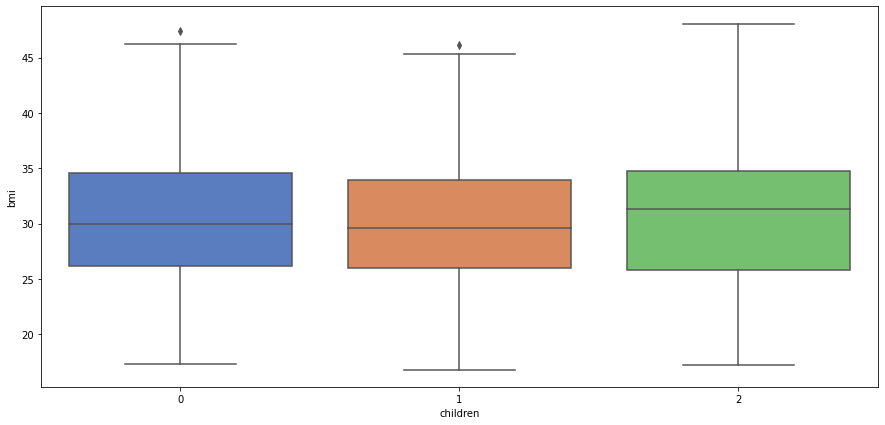

In [84]:
plt.figure(figsize=(15,7))

sns.boxplot(datafemale012["children"], datafemale012["bmi"],palette='muted')
plt.show()

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ BMI follows a normal distribution against

against the alternative hypothesis

>$H_a:$ BMI does not follow a normal distribution

In [85]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(datafemale012['bmi']) 
print('The p-value is', p_value)

The p-value is 0.010864038951694965


Since p-value of the test is large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [86]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( datafemale012['bmi'][datafemale012['children']== 0], 
                                   datafemale012['bmi'][datafemale012['children']== 1], 
                                   datafemale012['bmi'][datafemale012['children']== 2])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.3899432394522804


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we assume that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Let's find the p-value

In [87]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(datafemale012.loc[datafemale012['children'] == 0, 'bmi'],
                              datafemale012.loc[datafemale012['children'] == 1, 'bmi'],
                              datafemale012.loc[datafemale012['children'] == 2, 'bmi'])
print('The p-value is ' + str(p_value))

The p-value is 0.7158579926754841


### Insight
As the p-value is much larger than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that  at least one means of BMI for women with no children, one child and two children is different from the rest at 5% significance level.